# CZ/CE 4041 Machine Learning
## Plant Seedling Classification [Kaggle] 
### Approach 2: kNN Algorithm

### Team
* Dwivedee Lakshyajeet
* Gupta Jay
* Bansal Aditya
* Mantri Raghav
* Bhatia Ritik

> **Warning:** This notebook was created on the Kaggle platform where it fetches data from the Kaggle directories. It will not work by default on the Jupyter Notebook Platform.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-seedlings-classification/sample_submission.csv
/kaggle/input/plant-seedlings-classification/test/fd87b36ae.png
/kaggle/input/plant-seedlings-classification/test/0e8492cb1.png
/kaggle/input/plant-seedlings-classification/test/8d6acbe9b.png
/kaggle/input/plant-seedlings-classification/test/54b3afd58.png
/kaggle/input/plant-seedlings-classification/test/6049234e6.png
/kaggle/input/plant-seedlings-classification/test/82b5f4d33.png
/kaggle/input/plant-seedlings-classification/test/a0f37c726.png
/kaggle/input/plant-seedlings-classification/test/e0ec5b6a1.png
/kaggle/input/plant-seedlings-classification/test/1cfd91582.png
/kaggle/input/plant-seedlings-classification/test/456d507c0.png
/kaggle/input/plant-seedlings-classification/test/d6d31dcbe.png
/kaggle/input/plant-seedlings-classification/test/e1abb4ff9.png
/kaggle/input/plant-seedlings-classification/test/aa7d098d1.png
/kaggle/input/plant-seedlings-classification/test/e19673dc9.png
/kaggle/input/plant-seedlings-classif

/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/4ae939d7d.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b8664f705.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/628b08c82.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/9ab3b61db.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/086894274.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b8c3b0f4b.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b0885ca26.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/0bccfe309.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/d0af40a2d.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/f7bbaeed3.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/7b95f2701.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/3fb764193.png
/kag

/kaggle/input/plant-seedlings-classification/train/Black-grass/2aa60045d.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/a47cfeec4.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/c025e2886.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/48141d6a7.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/ed540beb6.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/b26a7a6ed.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/d0ad9c78b.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/8029e3396.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/86dfe670c.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/075d004bc.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/c3b38d028.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/a1cb5a321.png
/kaggle/input/plant-seedlings-classification/train/Black-grass/e0380dff9.png

/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/93d9858f0.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/de82f96f1.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/6d2f11b51.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/17d3e7e2c.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/f9d597956.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/88a48f427.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/3d109d1b0.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/549a41c42.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/3c46bd512.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/86f407dd7.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/9b7799b3c.png
/kaggle/input/plant-seedlings-classification/train/Loose Silky-bent/d0228efc3.png
/kaggle/input/pl

/kaggle/input/plant-seedlings-classification/train/Common Chickweed/57731eb29.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/40c5757c0.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/28285eb94.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/1d00f7fab.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/eddaf3d47.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/48bc50005.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/096eb593d.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/4e34f35c1.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/f1f82a44c.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/1007fd84f.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/085df38fb.png
/kaggle/input/plant-seedlings-classification/train/Common Chickweed/14b7eab5d.png
/kaggle/input/pl

/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/00d030ea0.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/85f33fcee.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/58e22d25a.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/7adff29ac.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/b8ac37dcd.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/f263c0f9f.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/0f2dbf503.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/6c7043cc5.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/afee78134.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/19f14f508.png
/kaggle/input/plant-seedlings-classification/train/Small-flowered Cranesbill/6226031d8.png

## Fetch Data from Kaggle's Directory

In [2]:
import os

data_directory = "../input/plant-seedlings-classification/"
train_data_directory = os.path.join(data_directory, "train")
test_data_directory = os.path.join(data_directory, "test")

## Data Preprocessing using OpenCV

In [3]:
import cv2
import numpy as np

# References
#   - Gábor Vecsei (Kaggle)
#   - OpenCV Docs (https://docs.opencv.org/3.4/d7/d37/tutorial_mat_mask_operations.html)

"""
Creating a mask to extract the relevant features from the plant images.

    Args:
        - image: OpenCV Image 
"""
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    sensitivity = 35
    
    # Get pixels from image in the following (Hue, Saturation, Lightness) range
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

"""
Applying the mask on the image.

    Args:
        - image: OpenCV Image
"""
def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

In [4]:
from glob import glob

images = []
labels = []

"""
Loading data from our source, folder by folder. 
Every folder contains one type of plant seedling images.
We convert RGB images to a Grayscale vector using OpenCV and apply a mask on it. 
"""
for class_folder_name in os.listdir(train_data_directory):
    class_folder_path = os.path.join(train_data_directory, class_folder_name)
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        # Read the image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        # Resize the image to 150 x 150
        image = cv2.resize(image, (150, 150))
        # Apply mask on the image
        image = segment_plant(image)
        # Convert image to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Resize the image to 45 x 45
        image = cv2.resize(image, (45,45))
        # Flatten
        image = image.flatten()
        
        # Append image to the list of all images
        images.append(image)
        # Append lable to the list of all labels
        labels.append(class_folder_name)

# List of Image Arrays
images = np.array(images)

# List of Labels
labels = np.array(labels)

In [6]:
import pprint as pp

# Dictionary to convert Labels to IDs
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
# Dictionary to convert IDs to Labels
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

print("Label Legend:")
print("-------------")
pp.pprint(label_to_id_dict)

Label Legend:
-------------
{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}


Label: Common wheat
Label ID: 4


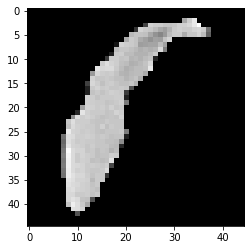

In [7]:
import matplotlib.pyplot as plt

# Displaying a sample image from our data
plt.imshow(np.reshape(images[734], (45,45)), cmap="gray")
print("Label:", labels[734])
print("Label ID:", label_to_id_dict[labels[734]])

In [8]:
from sklearn.preprocessing import StandardScaler

# Adding a label ID to our data using the dictionary 
label_ids = np.array([label_to_id_dict[x] for x in labels])

# Normalizing our data such that it has mean of 0 and variance of 1 for faster learning 
images = StandardScaler().fit_transform(images)

print("Number of Examples, Size of Example: ", end="")
print(images.shape)

Number of Examples, Size of Example: (4750, 2025)


## kNN Clustering 

### Training

In [9]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Using the standard K-Nearest Neighbours Classifer from SkLearn
knn = OneVsRestClassifier(KNeighborsClassifier())

# Fitting on the data
knn.fit(images,label_ids)

OneVsRestClassifier(estimator=KNeighborsClassifier())

### Testing

In [10]:
images_test = []

"""
Loading data from our source, folder by folder. 
Every folder contains one type of plant seedling images.
We convert RGB images to a Colored vector using OpenCV and apply a mask on it. 
"""
for image_path in glob(os.path.join(test_data_directory, "*.png")):
    # Read the image
    image_test = cv2.imread(image_path, cv2.IMREAD_COLOR)
    # Resize the image to 150 x 150
    image_test = cv2.resize(image_test, (150, 150))
    # Apply mask on the image
    image_test = segment_plant(image_test)
    # Convert image to grayscale
    image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
    # Resize the image to 45 x 45
    image_test = cv2.resize(image_test, (45,45))
    # Flatten
    image_test = image_test.flatten()

    # Append image to the list of all images
    images_test.append(image_test)
    # Append lable to the list of all labels

# List of Image Arrays
images_test = np.array(images_test)

In [11]:
# Normalizing our data such that it has mean of 0 and variance of 1 for faster learning 
images_test = StandardScaler().fit_transform(images_test)

print("Number of Examples, Size of Example: ", end="")
print(images_test.shape)

Number of Examples, Size of Example: (794, 2025)


In [12]:
# Testing using our Test Set
Z = knn.predict(images_test)

In [26]:
names = []

# Get all the images from the test data directory
for image_path in glob(os.path.join(test_data_directory, "*.png")):
    names.append(image_path)

In [27]:
pred_classes = []

# Get the prediction classes using our dictionary defined in the beginning of the notebook
for pred_class in Z:
    pred_classes.append(id_to_label_dict[pred_class])

## Submission File

In [29]:
import pandas as pd

my_submission = pd.DataFrame({'file': os.listdir('../input/plant-seedlings-classification/test'), 'species': pred_classes})
my_submission.to_csv('test_classification_results.csv', index=False)